In [ ]:
library(cmdstanr)

In [ ]:
install_cmdstan()

In [4]:
df = readRDS("goat.rds")

In [5]:
str(df)

'data.frame':	150 obs. of  4 variables:
 $ death : int  20 34 1 2 3 3 50 26 1 50 ...
 $ status: int  1 1 1 1 1 1 0 1 1 0 ...
 $ weight: num  5.38 7.41 9.27 6.23 5.23 ...
 $ group : chr  "A" "A" "A" "A" ...


In [8]:
library("tidyverse")

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0      v purrr   1.0.1 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.5.0 
v readr   2.1.3      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [9]:
df <- df %>% group_by(group)

In [10]:
dl <- list(
  N = nrow(df),
  G = length(unique(df$group)),
  time = df$death,
  weight = (df$weight-12)/12,
  event = df$status,
  gid = df %>% group_indices()
)

---

## Full Model

In [11]:
model_full = cmdstan_model("goat_cmd.stan") # full model

In [12]:
fit = model_full$sample(
    data = dl,
    seed = 1234,
    chains = 4,
    parallel_chains = 4,
    refresh =500
)

Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/var/folders/zj/p752w6gn671bt9k5d2v45phm0000gp/T/RtmpN3f4iU/model-82cb3a4350b4.stan', line 35, column 3 to column 21)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: weibull_lpdf: Scale parameter is 0, but must be positive finite! (in '/var/folders/zj/p752w6gn671bt9k5d2v45phm0000gp/T/RtmpN3f4iU/model-82cb3a4350b4.stan', line 39, column 12 to column 44)

Chain 1 If this warning occurs sporadically, such as for highly constrained v

Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: weibull_lpdf: Scale parameter is 0, but must be positive finite! (in '/var/folders/zj/p752w6gn671bt9k5d2v45phm0000gp/T/RtmpN3f4iU/model-82cb3a4350b4.stan', line 39, column 12 to column 44)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: weibull_lpdf: Scale parameter is 0, but must be positive finite! (in '/var/folders/zj/p752w6gn671bt9k5d2v45phm0000gp/T/RtmpN3f4iU/model-82cb3a4350b4.stan', line 39, column 12 to column 44)

Chain 2 If this warning occurs sporadically, such as for highly constraine

Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: weibull_lpdf: Scale parameter is 0, but must be positive finite! (in '/var/folders/zj/p752w6gn671bt9k5d2v45phm0000gp/T/RtmpN3f4iU/model-82cb3a4350b4.stan', line 39, column 12 to column 44)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: weibull_lpdf: Scale parameter is 0, but must be positive finite! (in '/var/folders/zj/p752w6gn671bt9k5d2v45phm0000gp/T/RtmpN3f4iU/model-82cb3a4350b4.stan', line 39, column 12 to column 44)

Chain 3 If this warning occurs sporadically, such as for highly constraine

Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 2 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 2 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 2 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 3 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 


Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/var/folders/zj/p752w6gn671bt9k5d2v45phm0000gp/T/RtmpN3f4iU/model-82cb3a4350b4.stan', line 35, column 3 to column 21)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in '/var/folders/zj/p752w6gn671bt9k5d2v45phm0000gp/T/RtmpN3f4iU/model-82cb3a435

Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 4 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 2 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 3 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 4 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 2 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 3 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 1 finished in 1.6 seconds.
Chain 2 finished in 1.5 seconds.
Chain 3 finished in 1.5 seconds.
Chain 4 Iteration: 2000 / 2000 [100%]  (Sampling) 
Chain 4 finished in 1.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.5 seconds.
Total execution time: 1.9 seconds.



In [13]:
fit$summary()

variable,mean,median,sd,mad,q5,q95,rhat,ess_bulk,ess_tail
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lp__,-478.11036975,-477.78100000,2.06600044,1.93405170,-482.00260000,-475.3859500,1.0012105,1739.438,2117.443
a,2.04827251,2.05978000,0.52097080,0.52593752,1.17064200,2.8747280,1.0028065,1668.819,1994.100
a_group[1],1.07126617,1.07342500,0.61155446,0.61140941,0.05827491,2.0551700,1.0024235,1948.257,2258.673
a_group[2],0.79203835,0.78104350,0.53910733,0.54590666,-0.07134877,1.7012475,1.0027686,1732.366,2193.499
a_group[3],0.09438209,0.08495515,0.53762990,0.53127044,-0.75776765,1.0004130,1.0028118,1700.995,2189.473
b_group[1],-0.88388992,-0.88570400,0.69093209,0.68627478,-2.03485350,0.2533873,0.9999944,3225.187,2467.369
b_group[2],-0.15963014,-0.16158600,0.22947675,0.22590650,-0.52545860,0.2254015,1.0012341,3797.145,2901.932
b_group[3],-0.03408569,-0.04014805,0.23345906,0.23654520,-0.40978930,0.3520551,1.0043662,3819.887,2606.750
k,0.72499463,0.72475350,0.05182131,0.05248997,0.64100745,0.8104268,1.0006190,3267.997,2733.631


In [ ]:
fit$diagnostic_summary()

## Posterior Checks

In [16]:
library(rstan)

Loading required package: StanHeaders

rstan (Version 2.21.7, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


Attaching package: 'rstan'


The following object is masked from 'package:tidyr':

    extract




In [ ]:
fit$save_object(file="cmd_fit_full.RDS")

In [ ]:
fit <- readRDS("cmd_fit_full.RDS")

In [18]:
stanfit <- rstan::read_stan_csv(fit$output_files())

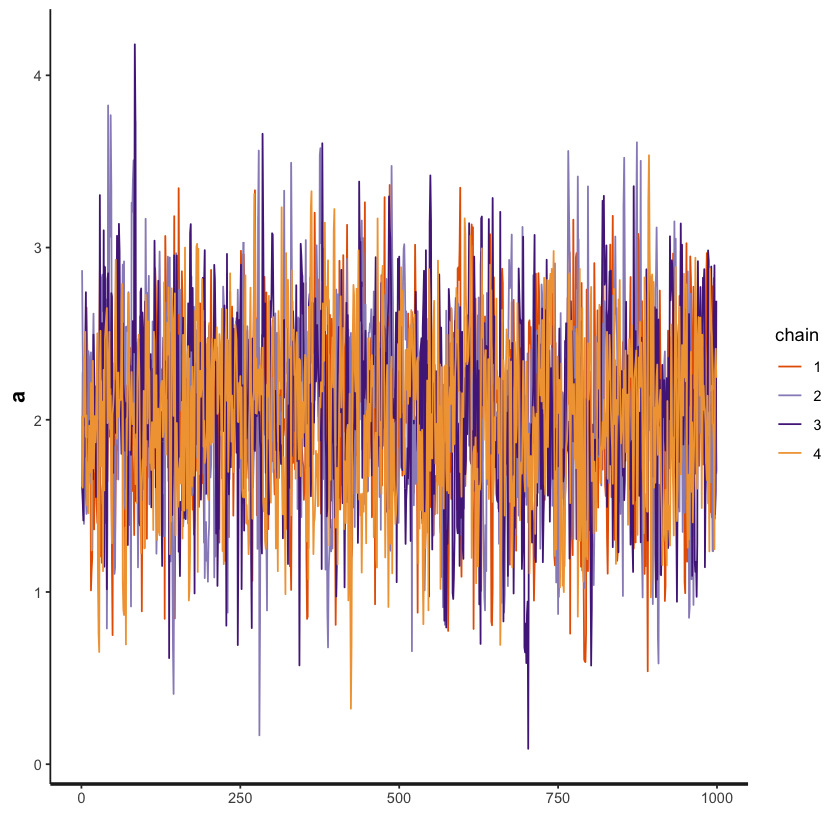

In [19]:
traceplot(stanfit, pars=c("a"))

In [20]:
theme_Posterior = theme(
  axis.line.x = element_line(arrow=arrow(length=unit(0.05, "cm")), lineend = "butt"),
  panel.background = element_rect(fill="transparent"), 
  panel.border = element_rect(fill="transparent"),
  plot.background = element_rect(fill = "transparent"),
  #panel.spacing.y = unit(1,"lines"),
  plot.margin = unit(c(1,1,1,1), "cm"), 
  #
  axis.title.y = element_blank(), 
  axis.text.y = element_text(color = "grey20", size = 8, angle = 0, hjust = 1, vjust = 0, face = "plain"),
  axis.text.x = element_text(color="grey20",hjust=1, vjust=1, size=8, angle=50, face="plain"), 
  axis.ticks.y = element_blank()
)

ci_level: 0.9 (90% intervals)

outer_level: 0.95 (95% intervals)



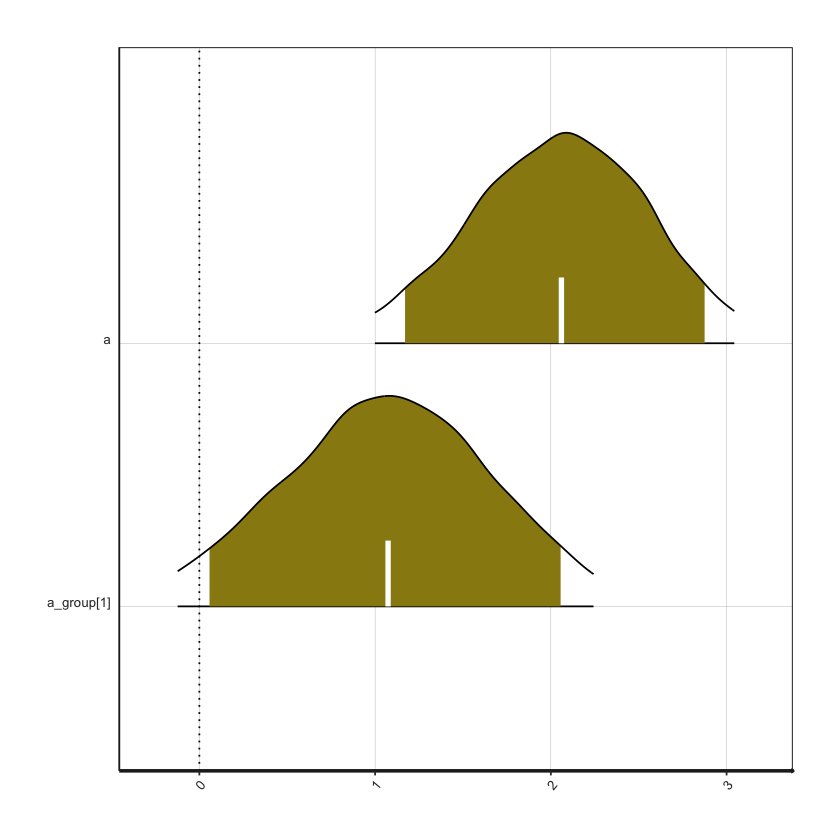

In [22]:
plot(stanfit, 
     pars=names(stanfit)[c(1,2)], 
     show_density=TRUE,
     fill_color="#998811",
     est_color="#ffffff",
     ci_level=0.9, outer_level=0.95) +
geom_vline(xintercept = 0, linetype=3, linewidth=0.5) + 
theme_Posterior

In [23]:
library(bayesplot)

This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



In [24]:
draws <- extract(stanfit)

In [25]:
str(draws)

List of 14
 $ a      : num [1:4000(1d)] 0.75 1.83 2.81 2.43 2.25 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ a_group: num [1:4000, 1:3] 2.29 1.386 0.423 0.31 0.977 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ iterations: NULL
  .. ..$           : NULL
 $ b_group: num [1:4000, 1:3] -0.588 -0.68 -0.341 -1.232 -0.404 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ iterations: NULL
  .. ..$           : NULL
 $ k      : num [1:4000(1d)] 0.735 0.668 0.799 0.666 0.768 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL
 $ mu     : num [1:4000, 1:150] 28.9 36.2 30.4 30.4 31.6 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ iterations: NULL
  .. ..$           : NULL
 $ lambda : num [1:4000, 1:150] 23.9 27.3 26.8 22.8 27 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ iterations: NULL
  .. ..$           : NULL
 $ pred   : num [1:4000, 1:150] 0.00307 0.37776 0.23588 1.76868 24.055 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ iterations: NULL
  .. 

In [26]:
draws$pred

3.07334e-03,3.3250500,7.939700,0.0874951,14.334900,3.41135e+00,71.210900,2.99192,13.386600,3.865090,⋯,5.929620,17.1641000,49.65480000,2.606260,0.543495,13.9732000,1.8128200,0.3519520,6.451370,11.8728000
3.77761e-01,3.2991600,285.952000,51.3723000,12.745500,8.76536e-01,45.659300,7.65304,0.553588,131.523000,⋯,4.410620,50.6657000,1.17554000,2.337550,1.967130,0.0331735,6.2256600,10.4264000,6.188120,0.9922410
2.35880e-01,4.9248700,20.635000,26.4175000,10.520600,4.24143e+01,12.654100,25.57070,47.600100,50.466400,⋯,9.479970,1.1709600,0.94548400,3.329010,0.429793,0.7676140,3.2352200,0.9177800,4.224530,4.7360300
1.76868e+00,6.3525800,39.839900,6.5094600,50.437200,7.44362e-01,38.810500,26.98930,2.061940,3.013430,⋯,0.986486,2.2655600,0.07032840,0.947948,11.118200,1.9430700,2.4113000,4.3101800,1.193850,0.9918610
2.40550e+01,6.6228500,142.343000,6.4709300,0.940254,2.09201e+02,18.557100,27.85340,11.754200,18.272000,⋯,13.208900,31.3847000,7.57483000,1.825990,4.937860,7.4962700,5.8367100,14.6629000,16.219600,17.8122000
8.75605e+00,7.3472800,29.548200,21.8076000,24.065200,2.20895e+01,1.540600,137.19600,32.926500,139.665000,⋯,25.303800,11.4405000,14.50730000,2.628310,4.225560,5.1712400,4.5963800,0.1958010,3.774790,11.2487000
3.80181e+01,142.3940000,75.059000,0.0613584,99.796200,4.15217e+00,1.481740,5.16185,64.027600,3.162910,⋯,1.721830,1.2968600,8.73695000,16.593300,4.386530,0.0758473,2.2158700,0.4699870,55.694300,0.2670630
6.61244e+00,8.3149200,67.576800,28.9212000,18.894800,2.53453e+01,65.708100,22.07780,29.518400,53.312700,⋯,35.158200,2.0181500,4.04897000,2.904500,4.342980,9.9092000,2.1074900,3.3885700,13.097700,1.7089900
7.10522e+01,24.7234000,91.566500,207.5840000,28.661200,1.01815e+01,3.864970,11.82810,22.264400,61.311100,⋯,1.065440,6.6134800,4.72952000,0.788959,3.989550,3.8577300,3.7934400,0.9465510,23.318500,85.5361000
1.10792e+01,4.4777300,10.082000,42.7946000,17.115300,2.98215e+00,8.401310,76.79270,25.063500,0.478189,⋯,32.605700,1.3501100,1.70869000,2.381440,30.282400,1.4265500,58.0478000,4.5259400,6.289950,0.5706110
6.42975e+01,7.3436800,0.908589,8.6495200,80.784500,1.76057e+01,121.899000,25.55140,120.194000,27.156400,⋯,14.464900,0.5651550,3.07020000,8.182970,9.643850,29.3294000,1.8925600,5.2181800,3.689650,2.7044800


Warning message:
"Removed 55006 rows containing non-finite values (`stat_density()`)."


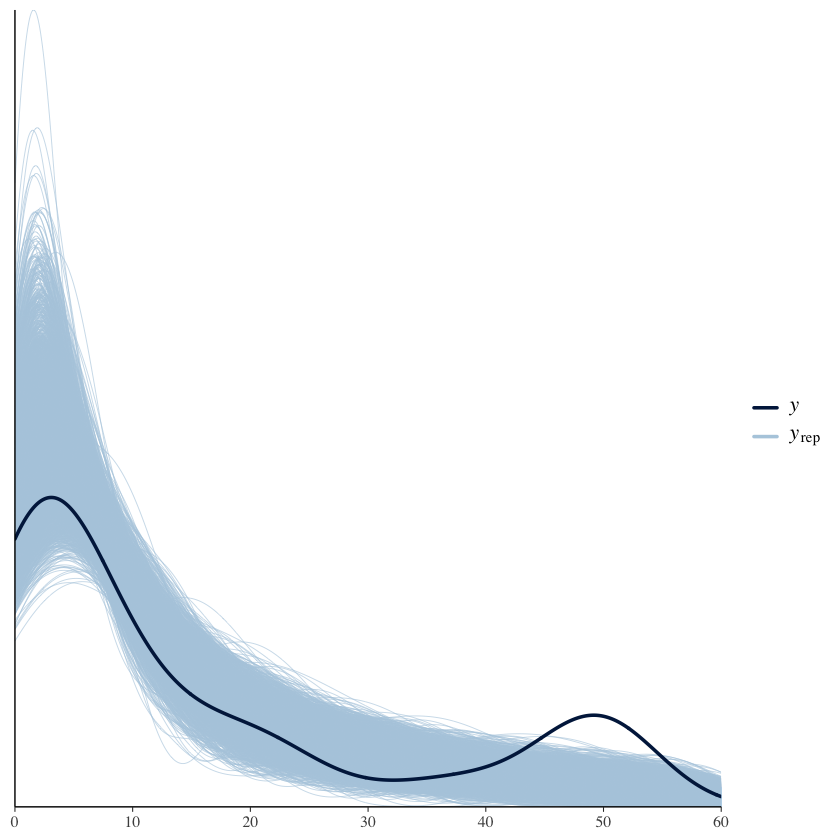

In [27]:
ppc_dens_overlay(y=dl$time, yrep = draws$pred) +
xlim(c(0,60))

## ECCD: Empirical Complementary Cumulative Distribution 

In [ ]:
library(tidybayes)
library(mltools)

In [ ]:
a <-  posterior::as_draws_rvars(fit$draws())
post_draws <- posterior::draws_of(a$pred)[1:4000,]

In [ ]:
N = 1000
dat <- data.frame(id=as.numeric(), pred=as.numeric())

In [ ]:
for (i in 1:N){
    obj <- empirical_cdf(post_draws[i,], ubounds = 1:50)
    obj <-  1 - obj$CDF
    obj <- data.frame(id=rep(i,50), x=seq(1,50), y=obj)
    dat <- rbind(dat, obj)
}

In [ ]:
library(survminer)
library(survival)

In [ ]:
df_survfit <-  data.frame(time=dl$time, event = dl$event)

In [ ]:
surf <- survfit(Surv(time, event)~1, data=df_survfit)

In [ ]:
p <- ggsurvplot(surf)

In [ ]:
data_obs <- p$data.survplot

In [ ]:
data_obs <- data.frame(surv=c(1, data_obs$surv), time=c(0, data_obs$time))

In [ ]:
data_obs

In [ ]:
dat %>%
    ggplot(aes(x=x, y=y)) +
    stat_lineribbon(aes(y=y), .width=c(.95), color="#08519C") +
    labs(x="Time (months)", y="Survivial Probability") +
    scale_fill_brewer() + 
    theme_bw() +
    geom_step(data = data_obs, mapping=aes(y=surv, x = time)) +
    theme(legend.position = "none") + xlim(0,50)

### Parameters Estimate

In [ ]:
mcmc_intervals(fit$draws(c("a_group", "b_group")), prob=0.95) +
vline_0() +
theme_bw() +
theme(axis.text=element_text(size=14)) +
labs(x="Parameters Estimate")


## Interactions

In [ ]:
fit <- readRDS("cmd_fit_full.RDS")

In [ ]:
pred <- fit$draws(c("pred"), format="matrix")
pred_mean <- apply(pred, 2, mean)
weight <- dl$weight
group <- dl$gid

In [ ]:
ppc_ribbon_grouped(pred_mean, pred, x=weight, group=group, prob = 0.95, y_draw = "both") +
labs(y="Survival Time in months", x="Weight") +
theme_bw() +
legend_none() +
hline_0() +
theme(axis.title = element_text(size=20)) +
theme(text=element_text(size=20))

In [ ]:
diff13 <- fit$draws(c("diff_13"), format="matrix")
diff12 <- fit$draws(c("diff_12"), format="matrix")
diff23 <- fit$draws(c("diff_23"), format="matrix")

In [ ]:
diff13_mean <- apply(diff13, 2, mean)
diff12_mean <- apply(diff12, 2, mean)
diff23_mean <- apply(diff23, 2, mean)

In [ ]:
library(ggpubr)

In [ ]:
ggarrange(
    ppc_ribbon(
        diff12_mean, diff12, x=weight, prob=0.95, y_draw = "both"
    ) +
    labs(y="Difference between Treatment A and B", x="Weight") +
    theme_light() +
    legend_none() +
    hline_0() +
    scale_y_continuous(0,600, 50) +
    ggtitle("A vs. B"),

    ppc_ribbon(
        diff13_mean, diff13, x=weight, prob=0.95, y_draw = "both"
    ) +
    labs(y="Difference between Treatment A and C", x="Weight") +
    theme_light() +
    legend_none() +
    hline_0() +
    scale_y_continuous(0,600, 50) +
    ggtitle("A vs. C"),    

    ppc_ribbon(
        diff23_mean, diff23, x=weight, prob=0.95, y_draw = "both"
    ) +
    labs(y="Difference between Treatment B and C", x="Weight") +
    theme_light() +
    legend_none() +
    hline_0() +
    scale_y_continuous(0,600, 50) +
    ggtitle("C vs. B"),
    ncol=2, nrow=2
)